In [1]:
import math
from math import sin, cos, log, ceil, pi
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size']=16



In [33]:
m_s = 50
g = 9.81
p = 1.091
v_e = 325
C_D = 0.15
m_po = 100
r = 0.5
A = math.pi *r**2
mdot_p = 20#For the first 5 seconds then 0
mdot = 20

def findVal(array, value):
    idx = (numpy.abs(array-value)).argmin()
    return idx

def f(u):
    h = u[0]
    v = u[1]
    return numpy.array([v,
                       -g+((mdot*v_e)/(m_s+m_p))-(((1/2)*p*v*abs(v)*A*C_D)/(m_s+m_p))])

def euler_step(u,f,dt):
    return u+dt*f(u)


totalTime = 0
m_p = 100
dt = 0.01
h0 = 0
v0 = 0
T = 100
N = int(T/dt)+1
t=numpy.linspace(0,T,N)


u = numpy.empty((N, 2))
u[0] = numpy.array([h0, v0])


m = numpy.zeros((N,2))
m[0] = numpy.array([totalTime, m_p])


for n in range(N-1):
    totalTime = totalTime + dt
    print(totalTime , 'Time')
    if totalTime > 5:
        step = 5
        mdot = 0
    else:
        step = totalTime
    
    m_p = m_po - mdot_p*step
    print(m_p , 'Prop')
    
    u[n+1] = euler_step(u[n], f,dt)
    m[n+1] = [m_p, totalTime]
    if u[n+1,0] < 0:
        break
u = u[0:n+1]

print(m[findVal(m[:,0], 3.2),1])

#print(u)
#print(m)





0.01 Time
99.8 Prop
0.02 Time
99.6 Prop
0.03 Time
99.4 Prop
0.04 Time
99.2 Prop
0.05 Time
99.0 Prop
0.060000000000000005 Time
98.8 Prop
0.07 Time
98.6 Prop
0.08 Time
98.4 Prop
0.09 Time
98.2 Prop
0.09999999999999999 Time
98.0 Prop
0.10999999999999999 Time
97.8 Prop
0.11999999999999998 Time
97.6 Prop
0.12999999999999998 Time
97.4 Prop
0.13999999999999999 Time
97.2 Prop
0.15 Time
97.0 Prop
0.16 Time
96.8 Prop
0.17 Time
96.6 Prop
0.18000000000000002 Time
96.4 Prop
0.19000000000000003 Time
96.2 Prop
0.20000000000000004 Time
96.0 Prop
0.21000000000000005 Time
95.8 Prop
0.22000000000000006 Time
95.6 Prop
0.23000000000000007 Time
95.4 Prop
0.24000000000000007 Time
95.2 Prop
0.25000000000000006 Time
95.0 Prop
0.26000000000000006 Time
94.8 Prop
0.2700000000000001 Time
94.6 Prop
0.2800000000000001 Time
94.4 Prop
0.2900000000000001 Time
94.2 Prop
0.3000000000000001 Time
94.0 Prop
0.3100000000000001 Time
93.8 Prop
0.3200000000000001 Time
93.6 Prop
0.3300000000000001 Time
93.39999999999999 Prop
0.3

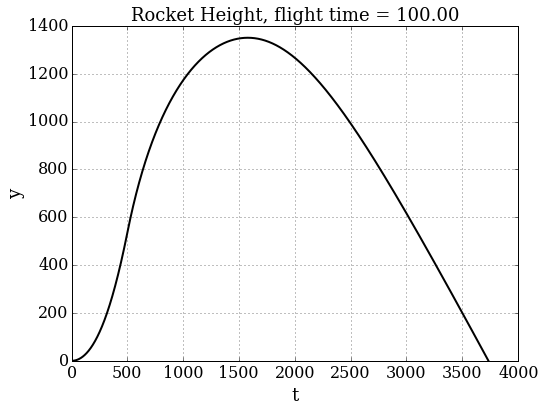

In [15]:
y = u[:,0]

pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r't', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Rocket Height, flight time = %.2f' % T, fontsize=18)
pyplot.plot(y,'k-', lw=2);

\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}

$$h' = v$$
\begin{align}
v'& = -g + \frac{\dot{m}_pv_e}{(m_s+m_p) } - \frac{\frac{1}{2}\rho v|v|AC_D}{(m_s+m_p)}
\end{align}

$$h^{n+1} = v^n$$
\begin{align}
v^{n+1}& = -g + \frac{\dot{m}_pv_e}{(m_s+m_p) } - \frac{\frac{1}{2}\rho v^n|v^n|AC_D}{(m_s+m_p)}
\end{align}



In [45]:
p = 7
r = numpy.array([11.2, 4.7, 6.6])
for n in range (3):
    x = sin(p/r[n])**3
    print(x)
    


0.20030150930292323
0.9900910096418035
0.6645423764180451
